##We have to implement Inverse CDF Sampling for the Fréchet distribution. The pdf of the distribution is -

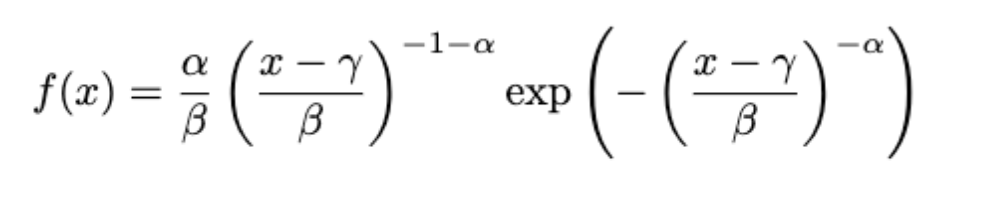

For Inverse CDF, we have to find the CDF of the function which is as follows

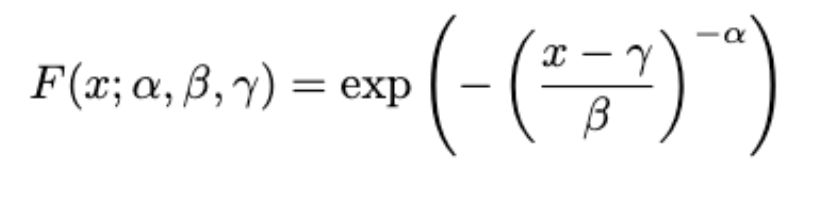

## The Inverse equation is as follows: 

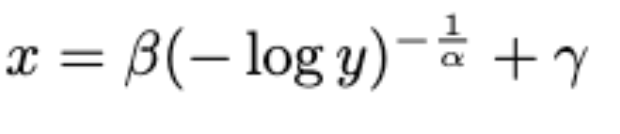

In [4]:
import numpy as np
from matplotlib.pyplot import *
from numpy import linspace, exp
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Generate a large number of samples from the distribution using inverse CDF sampling
def sample_generation(alpha, beta, gamma):
    num_samples = 100000
    u = np.random.uniform(size=num_samples)
    samples = beta * (-np.log(u)) ** (-1/alpha) + gamma
    mask = samples <= 4

    # use boolean indexing to select only values less than or equal to 4
    samples = samples[mask]

    # Plot the kernel density estimation of the samples
    x_plot = np.linspace(0, np.max(samples), num=1000).reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(samples.reshape(-1, 1))
    log_dens = kde.score_samples(x_plot)


    # Plot the true PDF of the Frechet distribution
    pdf_x = np.linspace(0, np.max(samples), num=1000)
    pdf_y = alpha / beta * (pdf_x - gamma) ** (-1 - alpha) * np.exp(-(pdf_x - gamma) ** (-alpha) / beta)

    return x_plot,np.exp(log_dens),pdf_x,pdf_y

<ipython-input-4-81974e811168>:25: RuntimeWarning: divide by zero encountered in power
  pdf_y = alpha / beta * (pdf_x - gamma) ** (-1 - alpha) * np.exp(-(pdf_x - gamma) ** (-alpha) / beta)
<ipython-input-4-81974e811168>:25: RuntimeWarning: divide by zero encountered in reciprocal
  pdf_y = alpha / beta * (pdf_x - gamma) ** (-1 - alpha) * np.exp(-(pdf_x - gamma) ** (-alpha) / beta)
<ipython-input-4-81974e811168>:25: RuntimeWarning: invalid value encountered in multiply
  pdf_y = alpha / beta * (pdf_x - gamma) ** (-1 - alpha) * np.exp(-(pdf_x - gamma) ** (-alpha) / beta)


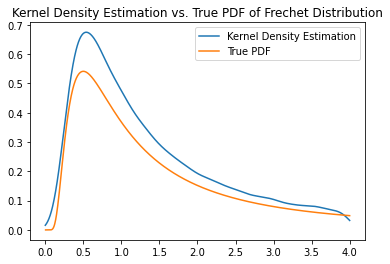

In [5]:
x,y, x_t, y_t = sample_generation(1, 1, 0)
plt.plot(x, y, label='Kernel Density Estimation')
plt.plot(x_t, y_t, label='True PDF')
plt.title('Kernel Density Estimation vs. True PDF of Frechet Distribution')
plt.legend()
plt.show()


<ipython-input-4-81974e811168>:25: RuntimeWarning: divide by zero encountered in power
  pdf_y = alpha / beta * (pdf_x - gamma) ** (-1 - alpha) * np.exp(-(pdf_x - gamma) ** (-alpha) / beta)
<ipython-input-4-81974e811168>:25: RuntimeWarning: divide by zero encountered in reciprocal
  pdf_y = alpha / beta * (pdf_x - gamma) ** (-1 - alpha) * np.exp(-(pdf_x - gamma) ** (-alpha) / beta)
<ipython-input-4-81974e811168>:25: RuntimeWarning: invalid value encountered in multiply
  pdf_y = alpha / beta * (pdf_x - gamma) ** (-1 - alpha) * np.exp(-(pdf_x - gamma) ** (-alpha) / beta)
<ipython-input-4-81974e811168>:25: RuntimeWarning: divide by zero encountered in power
  pdf_y = alpha / beta * (pdf_x - gamma) ** (-1 - alpha) * np.exp(-(pdf_x - gamma) ** (-alpha) / beta)
<ipython-input-4-81974e811168>:25: RuntimeWarning: invalid value encountered in multiply
  pdf_y = alpha / beta * (pdf_x - gamma) ** (-1 - alpha) * np.exp(-(pdf_x - gamma) ** (-alpha) / beta)
<ipython-input-4-81974e811168>:25: Runtim

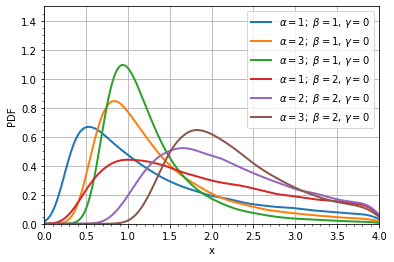

In [6]:
fig = figure()
ax = fig.add_subplot(111)

x,y,_,_ = sample_generation(1, 1, 0)
ax.plot(x,y,label=r'$\alpha=1;$ $\beta=1$, $\gamma=0$', linewidth=2)
x,y,_,_ = sample_generation(2, 1, 0)
ax.plot(x,y,label=r'$\alpha=2;$ $\beta=1$, $\gamma=0$', linewidth=2)
x,y,_,_ = sample_generation(3, 1, 0)
ax.plot(x,y,label=r'$\alpha=3;$ $\beta=1$, $\gamma=0$', linewidth=2)
x,y,_,_ = sample_generation(1, 2, 0)
ax.plot(x,y,label=r'$\alpha=1;$ $\beta=2$, $\gamma=0$', linewidth=2)
x,y,_,_ = sample_generation(2, 2, 0)
ax.plot(x,y,label=r'$\alpha=2;$ $\beta=2$, $\gamma=0$', linewidth=2)
x,y,_,_ = sample_generation(3, 2, 0)
ax.plot(x,y,label=r'$\alpha=3;$ $\beta=2$, $\gamma=0$', linewidth=2)
ax.grid(True)
ax.minorticks_on()
ax.legend(loc=1)
ax.set_xlim(0,4)
ax.set_ylim(0,1.5)
ax.set_xlabel("x")
ax.set_ylabel("PDF")
fig.savefig("Frechet_pdf.svg",bbox_inches="tight", pad_inches=.15)